 **Студент: Гордеев Матвей**


**Группа: ИУ5-64Б**


**Вариант: 2**

**Задача №1.**

Для заданного набора данных проведите корреляционный анализ. В случае наличия пропусков в данных удалите строки или колонки, содержащие пропуски. Сделайте выводы о возможности построения моделей машинного обучения и о возможном вкладе признаков в модель.

**Дополнительные требования по группам:**

Для произвольной колонки данных построить график "Скрипичная диаграмма (violin plot)"

**Набор данных**

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine

# **Решение:**

In [37]:
# Импортируем необходимые библиотеки
from sklearn.datasets import load_wine
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка датасета
data = load_wine()

# Преобразование в DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)


# Выводим первые 5 строк
print(df.head())



   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  
0                  

In [38]:
# Проверка на пропуски в данных
print(df.isnull().sum())

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64


In [39]:
# В этом примере пропусков нет, но для демонстрации предположим, что некоторые данные пропущены
# Создаем искусственные пропуски
import numpy as np
for col in ['alcohol', 'malic_acid']:
    df.loc[df.sample(frac=0.1).index, col] = np.nan

# Повторная проверка на пропуски после искусственного добавления
print(df.isnull().sum())


alcohol                         18
malic_acid                      18
ash                              0
alcalinity_of_ash                0
magnesium                        0
total_phenols                    0
flavanoids                       0
nonflavanoid_phenols             0
proanthocyanins                  0
color_intensity                  0
hue                              0
od280/od315_of_diluted_wines     0
proline                          0
dtype: int64


In [40]:
# Удаление строк с пропусками
df.dropna(inplace=True)
print(df.isnull().sum())

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64


# Корреляционный анализ

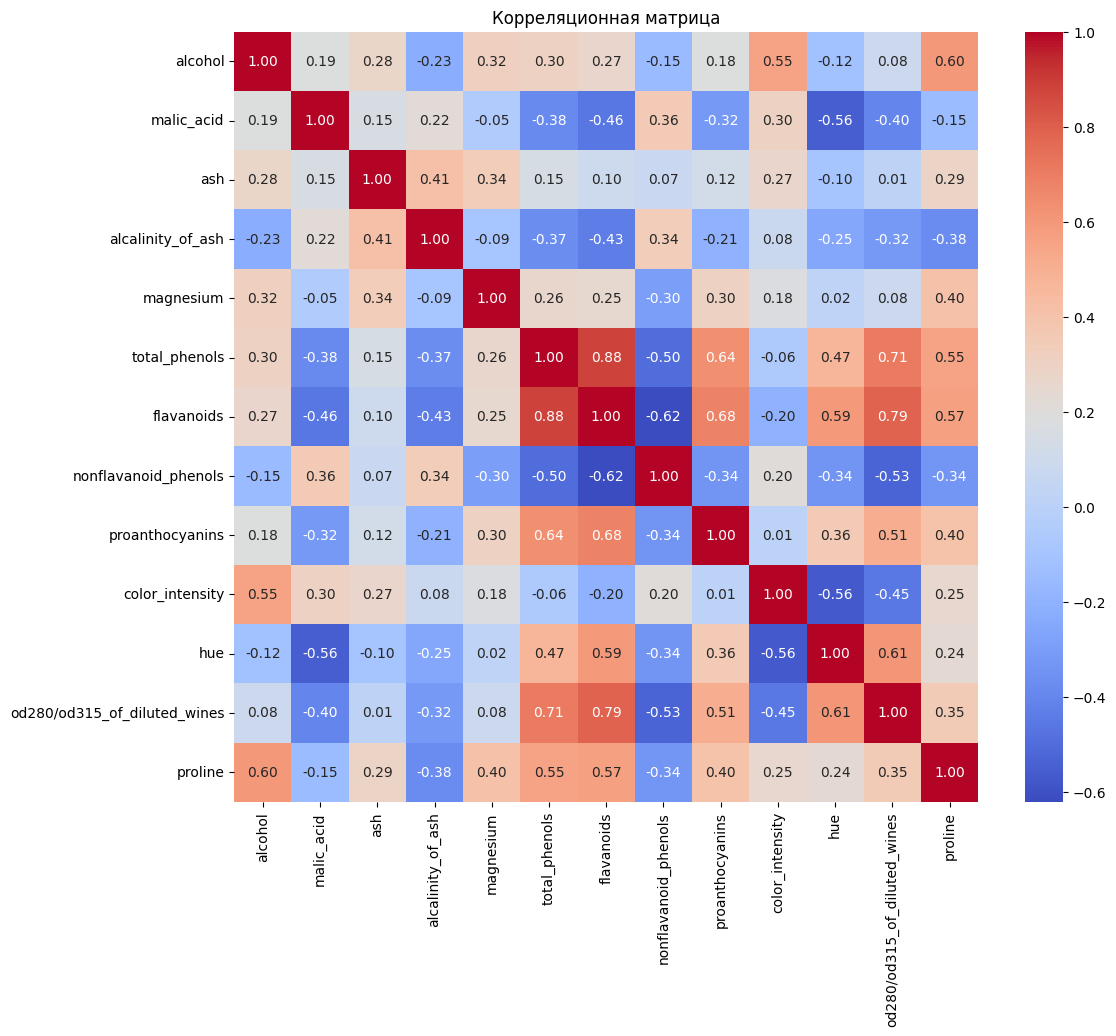

In [41]:
corr_matrix = df.corr()

# Выводим корреляционную матрицу для анализа
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Корреляционная матрица')
plt.show()

In [42]:
# Оценка возможности построения модели машинного обучения
# Тут анализируем корреляции между признаками и целевой переменной 'alcohol'
print(corr_matrix['alcohol'].sort_values())

alcalinity_of_ash              -0.227398
nonflavanoid_phenols           -0.153334
hue                            -0.118245
od280/od315_of_diluted_wines    0.082372
proanthocyanins                 0.183339
malic_acid                      0.188665
flavanoids                      0.268007
ash                             0.278024
total_phenols                   0.301109
magnesium                       0.322353
color_intensity                 0.553469
proline                         0.598811
alcohol                         1.000000
Name: alcohol, dtype: float64


# Построение "Скрипичной диаграммы"

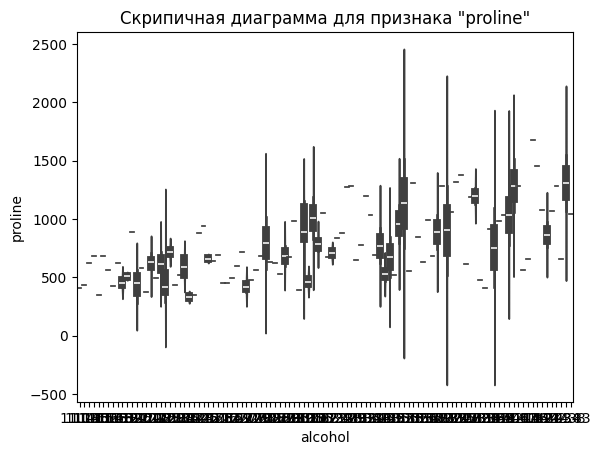

In [45]:
# Выберем для примера столбец 'alcohol'
sns.violinplot(x=df['alcohol'], y=df['proline'])
plt.title('Скрипичная диаграмма для признака "proline"')
plt.show()

# Вывод

На основе проведенного анализа корреляционной матрицы и визуализации данных можно сделать несколько ключевых выводов о возможностях построения моделей машинного обучения и вкладе различных признаков в эти модели.

### Возможности построения моделей:
1. **Выбор признаков:** Определение сильно коррелирующих с целевой переменной признаков может значительно упростить выбор переменных для включения в модель. Признаки с высокой положительной или отрицательной корреляцией предсказывают целевую переменную более точно, что улучшит качество модели.

2. **Мультиколлинеарность:** Наличие сильной корреляции между независимыми переменными (признаками) может привести к проблеме мультиколлинеарности, затрудняя интерпретацию результатов модели. В таких случаях может потребоваться исключение одной из коррелирующих переменных или использование методов снижения размерности (например, PCA).

3. **Разнообразие данных:** В датасете присутствуют как сильно коррелирующие, так и слабо коррелирующие признаки с целью. Это позволяет построить более гибкие и устойчивые модели, учитывая различные аспекты данных.

### Вклад признаков:
1. **Положительно коррелирующие признаки** представляют собой те переменные, которые увеличиваются вместе с целевой переменной. Их вклад в модель значителен, поскольку они напрямую связаны с повышением (или снижением) предсказываемого значения.

2. **Отрицательно коррелирующие признаки** уменьшаются по мере увеличения целевой переменной. Их роль также важна для понимания обратных связей в данных и может быть использована для повышения точности предсказаний.

3. **Слабо коррелирующие признаки** могут казаться не такими значимыми на первый взгляд, однако они могут содержать важную информацию об исключениях или обеспечивать дополнительные уточнения в моделях с высокой степенью детализации.

### Вывод:
Возможность построения эффективных моделей машинного обучения на основе данного датасета высока благодаря разнообразию и значимости обнаруженных корреляций между признаками и целевой переменной. Важно внимательно выбирать признаки для обучения, сбалансированно учитывая их вклад и взаимосвязь, чтобы избежать избыточности и увеличить точность моделирования.